In [3]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터 프레임으로 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)

In [4]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf" # 폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [5]:
# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

In [6]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [7]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

In [8]:
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

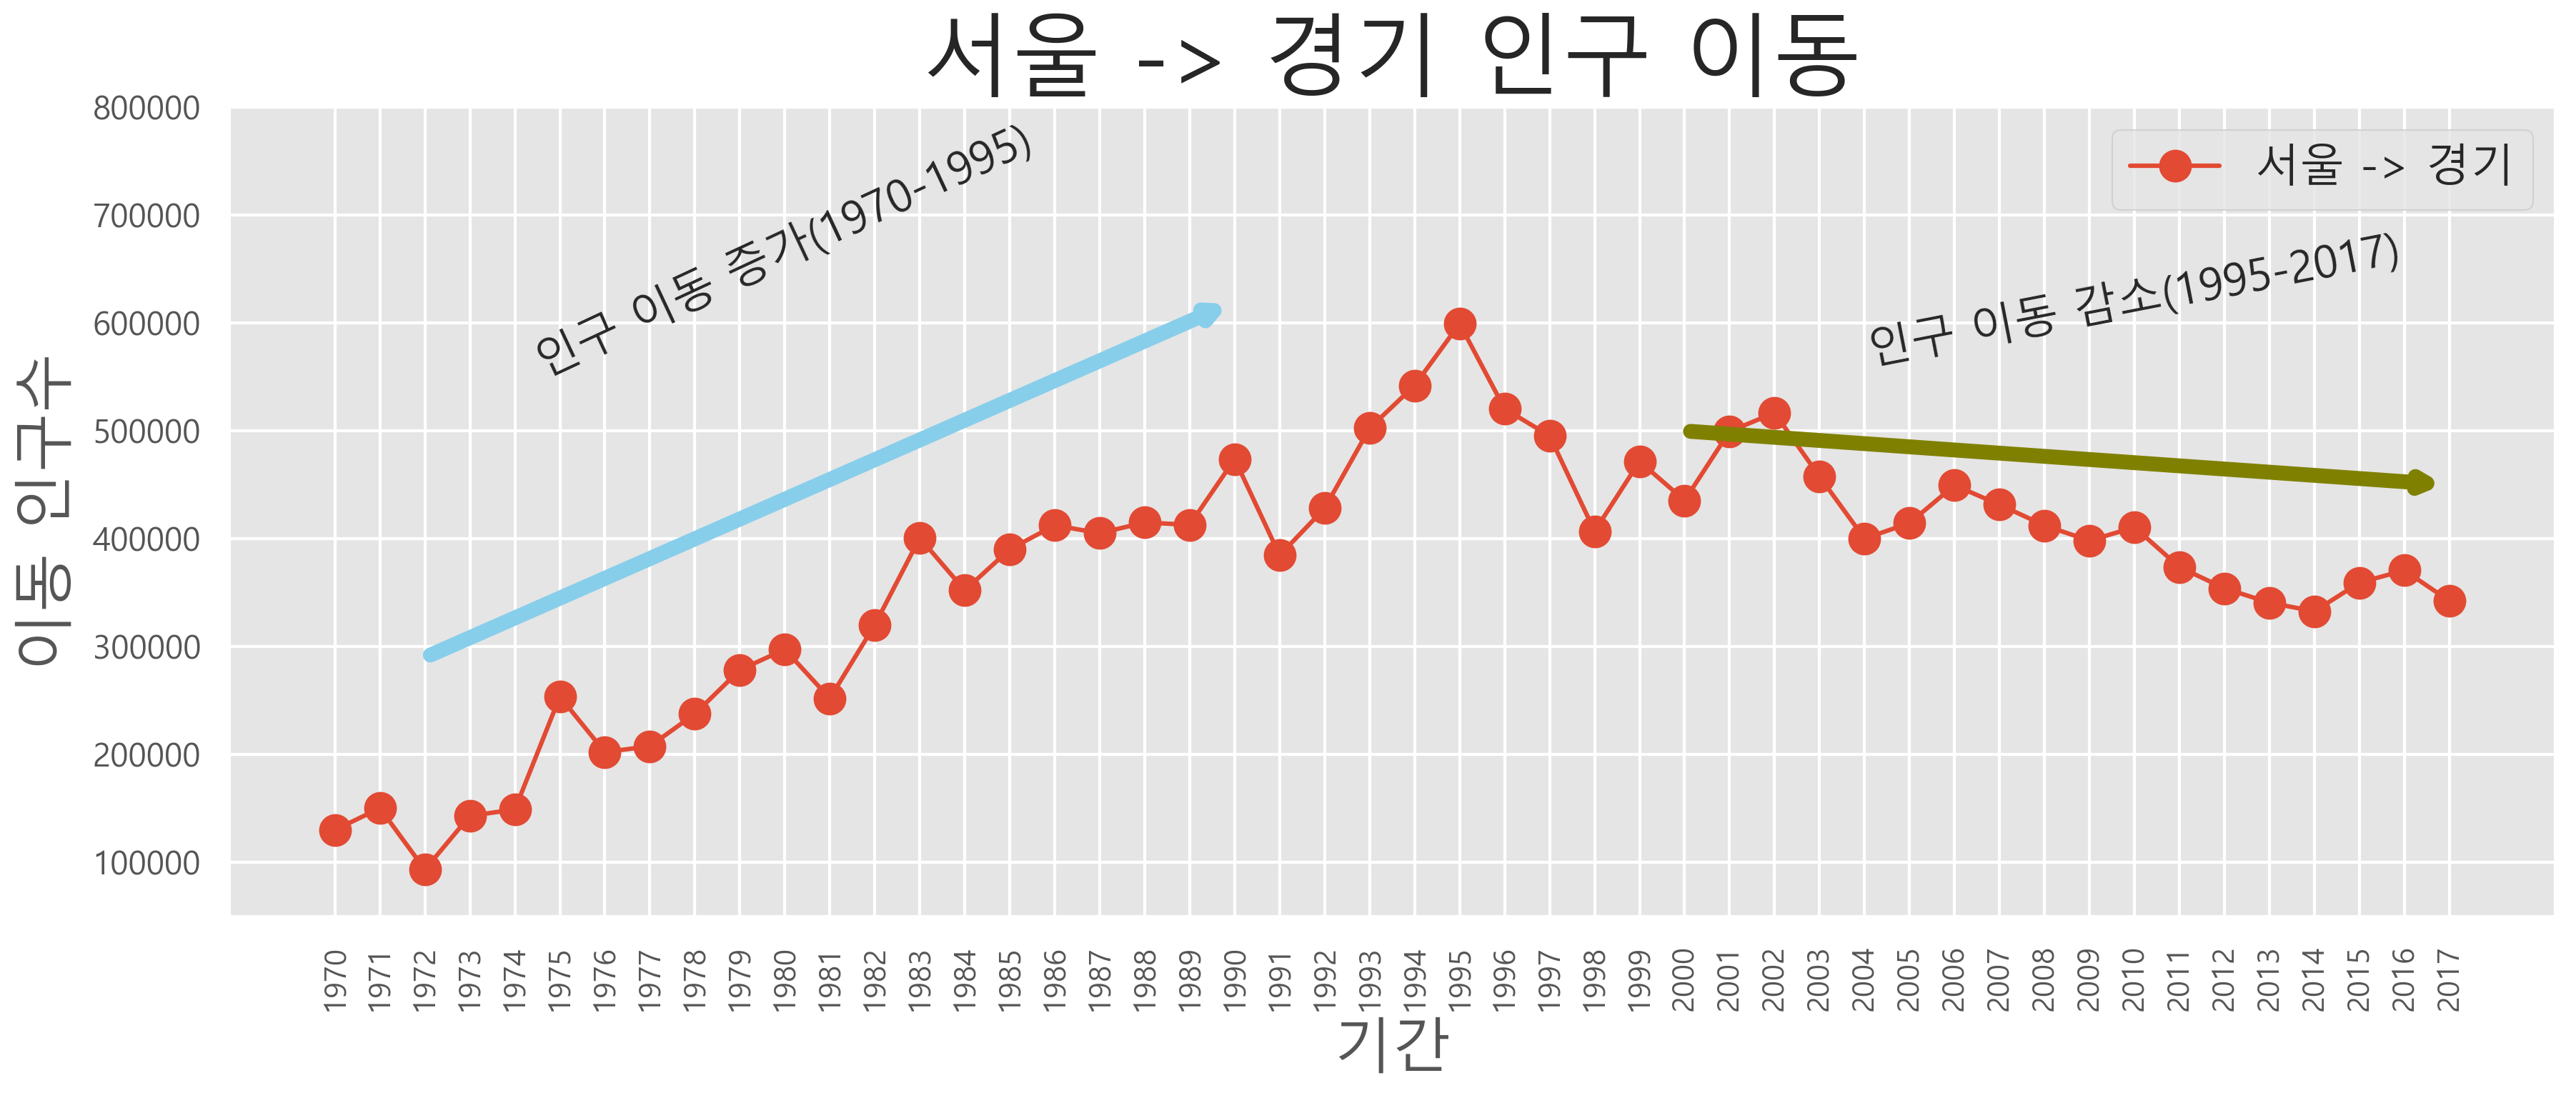

In [9]:
# 스타일 서식 지정
plt.style.use('ggplot')
# 그림사이즈 지정 (가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))
# x축 눈금 라벨 회전하기
plt.xticks(size='10',rotation='vertical')
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)
# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동', size=30)
# 축 이름 추가
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)
# 범례 표시
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)
# y축 범위 지정(최소값, 최대값)
plt.ylim(50000, 800000)
# 주석 표시 - 화살표
plt.annotate('',
             xy=(20,620000),        # 화살표의 머리 부분(끝점)
             xytext=(2,290000),     # 화살표의 꼬리 부분(시작점)
             xycoords='data',       # 좌표체계
             arrowprops=dict(arrowstyle='->',color='skyblue',lw=5), # 화살표 서식
             )

plt.annotate('',
             xy=(47,450000),        # 화살표의 머리 부분(끝점)
             xytext=(30,500000),     # 화살표의 꼬리 부분(시작점)
             xycoords='data',       # 좌표체계
             arrowprops=dict(arrowstyle='->',color='olive',lw=5), # 화살표 서식
             )

# 주석 표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)',                            # 텍스트 입력
             xy=(10,550000),                                        # 텍스트 위치 기준점
             rotation=25,                                     # 텍스트 회전 각도
             va='baseline',                                       # 텍스트 상하 정렬
             ha='center',                                       # 텍스트 좌우 정렬
             fontsize=15,                                       # 텍스트 크기
             )

plt.annotate('인구 이동 감소(1995-2017)',                    # 텍스트 입력
             xy=(40, 560000),                               # 텍스트 위치 기준점
             rotation=11,                                   # 텍스트 회전 각도
             va='baseline',                                 # 텍스트 상하정렬
             ha='center',                                   # 텍스트 좌우 정렬
             fontsize=15,                                   # 텍스트 크기
            ) 

plt.show()      # 변경사항 저장하고 그래프 출력


In [ ]:
# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10,
         color='olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

# y축 범위 지정(최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()  # 변경 사항 저장하고 그래프 출력

In [ ]:
#